In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis on the training data for labels

In [2]:
label_train_data = pd.read_csv("../data/label_train.csv")

In [3]:
label_train_data.head(5)

,Subject ID,Day,Breakfast Calories,Lunch Calories,Breakfast Carbs,Lunch Carbs,Breakfast Fat,Lunch Fat,Breakfast Protein,Lunch Protein
0,1,2,448.0,830,66.0,92,10.5,42.0,22.0,17
1,1,3,608.0,435,66.0,16,10.5,14.0,66.0,66
2,1,4,712.0,555,66.0,94,42.0,13.0,22.0,12
3,1,5,902.0,355,73.0,19,42.0,15.0,66.0,32
4,1,6,268.0,1180,24.0,81,10.5,54.5,22.0,88


In [4]:
label_train_data.info() 
#all entries are either integer or float values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Subject ID          324 non-null    int64  
 1   Day                 324 non-null    int64  
 2   Breakfast Calories  324 non-null    float64
 3   Lunch Calories      324 non-null    int64  
 4   Breakfast Carbs     324 non-null    float64
 5   Lunch Carbs         324 non-null    int64  
 6   Breakfast Fat       324 non-null    float64
 7   Lunch Fat           324 non-null    float64
 8   Breakfast Protein   324 non-null    float64
 9   Lunch Protein       324 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 25.4 KB


In [5]:
label_train_data.describe()
#obtaining statistical description of the data

,Subject ID,Day,Breakfast Calories,Lunch Calories,Breakfast Carbs,Lunch Carbs,Breakfast Fat,Lunch Fat,Breakfast Protein,Lunch Protein
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,22.777778,6.000000,552.666667,614.444444,57.444444,58.111111,21.000000,24.722222,36.666667,38.000000
std,14.179958,2.585983,201.117867,262.633719,18.034710,36.575720,14.872211,15.578822,20.773882,26.653609
min,1.000000,2.000000,268.000000,355.000000,24.000000,16.000000,10.500000,13.000000,22.000000,12.000000
25%,10.750000,4.000000,448.000000,435.000000,66.000000,19.000000,10.500000,14.000000,22.000000,17.000000
50%,21.000000,6.000000,608.000000,555.000000,66.000000,81.000000,10.500000,15.000000,22.000000,32.000000
75%,33.500000,8.000000,712.000000,830.000000,66.000000,92.000000,42.000000,42.000000,66.000000,66.000000
max,49.000000,10.000000,902.000000,1180.000000,73.000000,94.000000,42.000000,54.500000,66.000000,88.000000


In [6]:
label_train_data.isnull().sum()
#checking for missing values in the dataset, no missing values found

Subject ID            0
Day                   0
Breakfast Calories    0
Lunch Calories        0
Breakfast Carbs       0
Lunch Carbs           0
Breakfast Fat         0
Lunch Fat             0
Breakfast Protein     0
Lunch Protein         0
dtype: int64

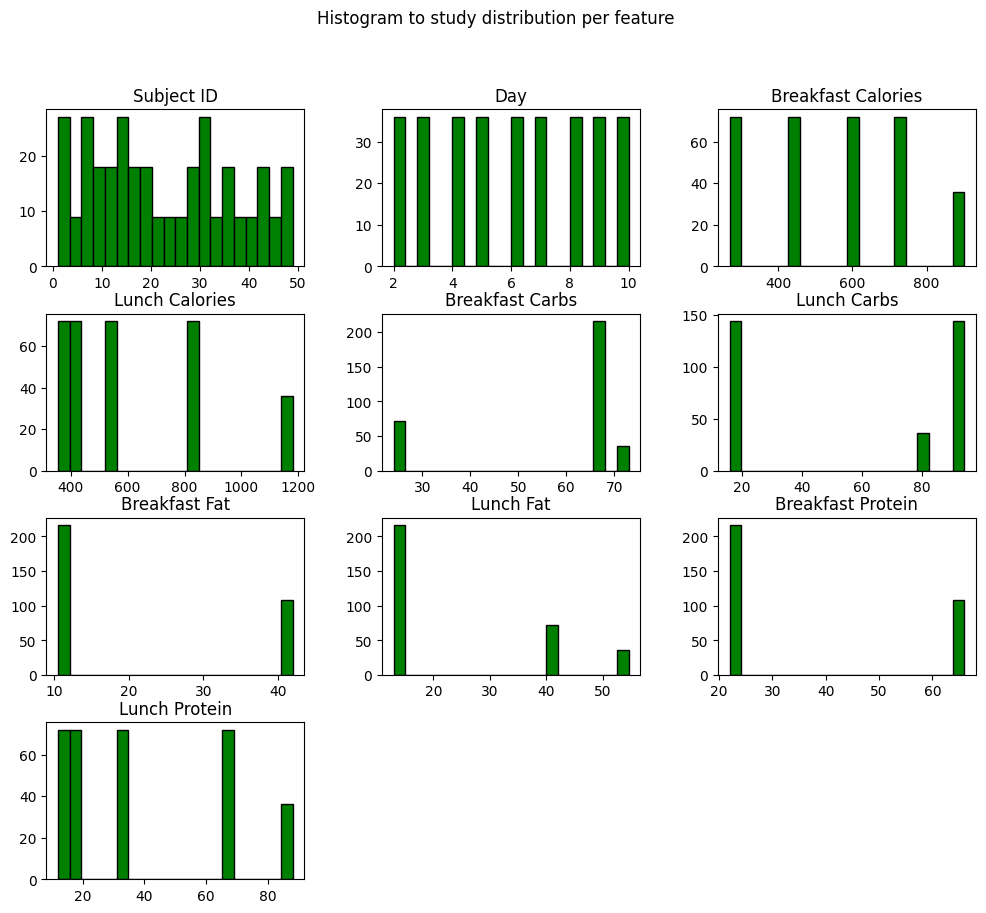

In [7]:
label_train_data.hist(bins=20, figsize = (12,10), color = 'green', edgecolor = 'black', grid=False)
plt.suptitle("Histogram to study distribution per feature")
plt.show()                      

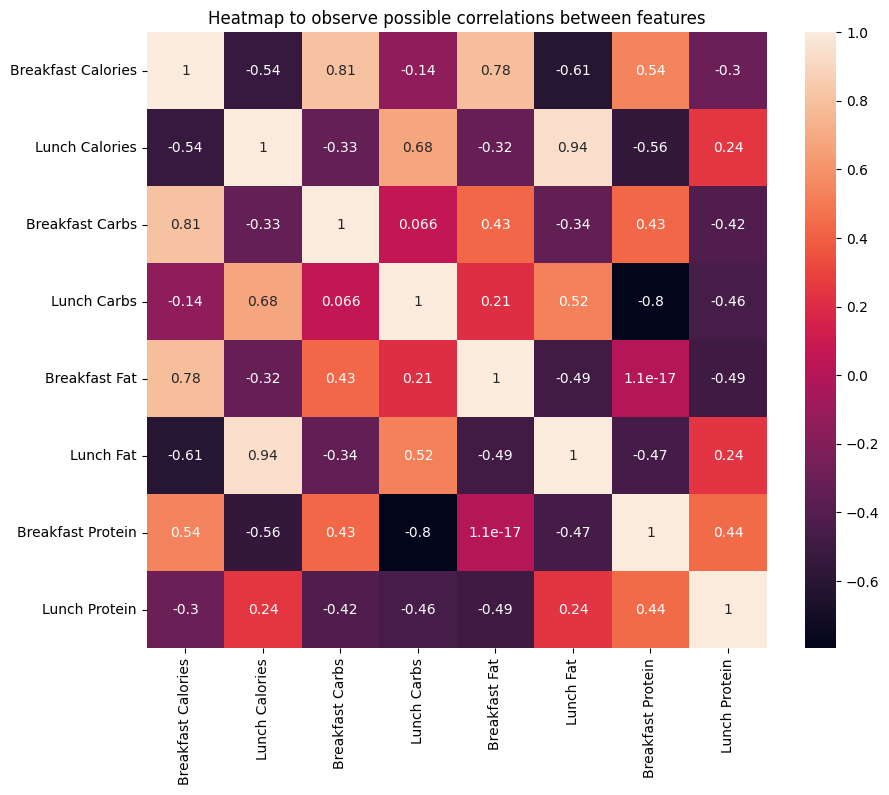

In [8]:
plt.figure(figsize = (10,8))
heatmap_labeldata = label_train_data.drop(columns=['Subject ID', 'Day'])
sns.heatmap(heatmap_labeldata.corr(), annot=True)
plt.title("Heatmap to observe possible correlations between features")
plt.show()

In [9]:
# Detect outliers using the IQR method
for col in ['Breakfast Calories', 'Lunch Calories']:
    Q1 = label_train_data[col].quantile(0.25)
    Q3 = label_train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = label_train_data[(label_train_data[col] < lower_bound) | (label_train_data[col] > upper_bound)]
    print(f"Outliers in {col}:\n", outliers)


Outliers in Breakfast Calories:
 Empty DataFrame
Columns: [Subject ID, Day, Breakfast Calories, Lunch Calories, Breakfast Carbs, Lunch Carbs, Breakfast Fat, Lunch Fat, Breakfast Protein, Lunch Protein]
Index: []
Outliers in Lunch Calories:
 Empty DataFrame
Columns: [Subject ID, Day, Breakfast Calories, Lunch Calories, Breakfast Carbs, Lunch Carbs, Breakfast Fat, Lunch Fat, Breakfast Protein, Lunch Protein]
Index: []


## Exploratory data analysis for cgm data

In [10]:
cgm_train_data = pd.read_csv("../data/cgm_train.csv")
cgm_train_data.head(5)

,Subject ID,Day,Breakfast Time,Lunch Time,CGM Data
0,1,2,2021-09-19 08:41:00,2021-09-19 12:24:00,"[('2021-09-19 08:20:00', 98.26666666666667), (..."
1,1,3,2021-09-20 09:50:00,2021-09-20 15:20:00,"[('2021-09-20 09:10:00', 97.18333333333334), (..."
2,1,4,2021-09-21 09:34:00,2021-09-21 13:09:00,"[('2021-09-21 09:20:00', 107.36666666666666), ..."
3,1,5,2021-09-22 09:46:00,2021-09-22 13:50:00,"[('2021-09-22 09:25:00', 107.28333333333333), ..."
4,1,6,2021-09-23 09:07:00,2021-09-23 13:17:00,"[('2021-09-23 08:55:00', 103.0), ('2021-09-23 ..."


In [11]:
cgm_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Subject ID      324 non-null    int64 
 1   Day             324 non-null    int64 
 2   Breakfast Time  324 non-null    object
 3   Lunch Time      324 non-null    object
 4   CGM Data        324 non-null    object
dtypes: int64(2), object(3)
memory usage: 12.8+ KB


In [12]:
cgm_train_data.describe()

,Subject ID,Day
count,324.000000,324.000000
mean,22.777778,6.000000
std,14.179958,2.585983
min,1.000000,2.000000
25%,10.750000,4.000000
50%,21.000000,6.000000
75%,33.500000,8.000000
max,49.000000,10.000000


In [13]:
cgm_train_data.isnull().sum()

Subject ID        0
Day               0
Breakfast Time    0
Lunch Time        0
CGM Data          0
dtype: int64

In [14]:
cgm_train_data.isna().sum()

Subject ID        0
Day               0
Breakfast Time    0
Lunch Time        0
CGM Data          0
dtype: int64

In [15]:
import ast
#analysing the list of glucose levels for a particular day and a particular subject id
sample_cgm = ast.literal_eval(cgm_train_data["CGM Data"][1])
sample_cgm

[('2021-09-20 09:10:00', 97.18333333333334),
 ('2021-09-20 09:15:00', 98.55),
 ('2021-09-20 09:20:00', 102.46666666666667),
 ('2021-09-20 09:25:00', 110.28333333333333),
 ('2021-09-20 09:30:00', 116.55),
 ('2021-09-20 09:35:00', 118.08333333333333),
 ('2021-09-20 09:40:00', 113.81666666666666),
 ('2021-09-20 09:45:00', 112.81666666666666),
 ('2021-09-20 09:50:00', 110.9),
 ('2021-09-20 09:55:00', 104.90365448504983),
 ('2021-09-20 10:00:00', 98.91638795986623),
 ('2021-09-20 10:05:00', 92.71666666666667),
 ('2021-09-20 10:10:00', 88.46666666666667),
 ('2021-09-20 10:15:00', 95.73333333333333),
 ('2021-09-20 10:20:00', 99.0),
 ('2021-09-20 10:25:00', 98.81666666666666),
 ('2021-09-20 10:30:00', 97.45),
 ('2021-09-20 10:35:00', 93.9),
 ('2021-09-20 10:40:00', 88.81666666666666),
 ('2021-09-20 10:45:00', 87.81666666666666),
 ('2021-09-20 10:50:00', 87.18333333333334),
 ('2021-09-20 10:55:00', 88.18333333333334),
 ('2021-09-20 11:00:00', 88.63333333333334),
 ('2021-09-20 11:05:00', 87.55),

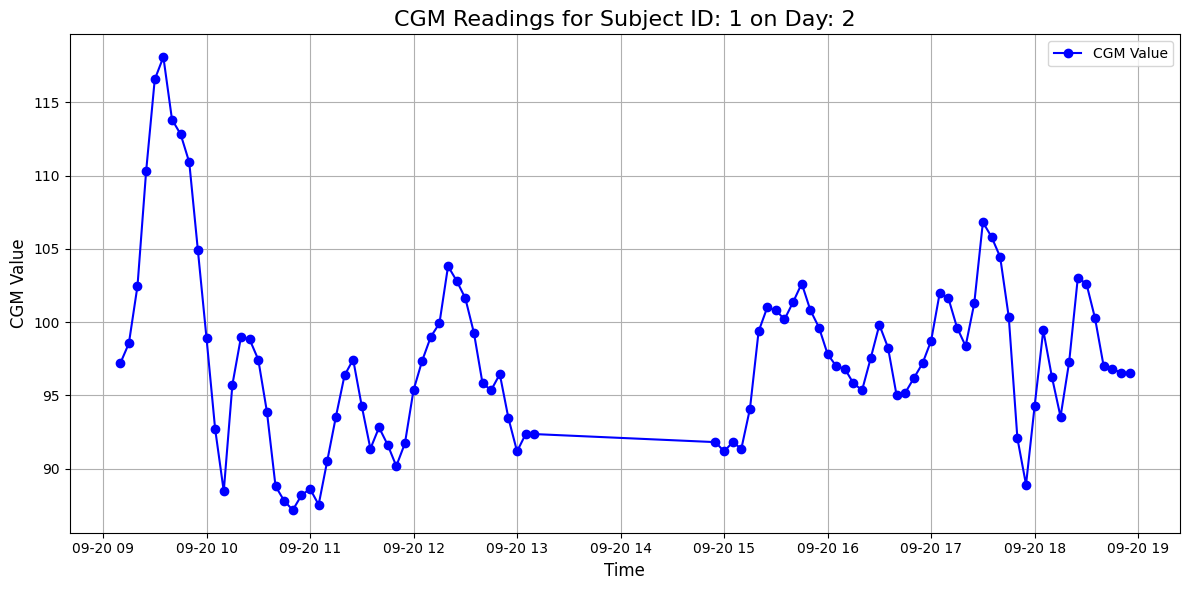

In [16]:
timestamps = [i[0] for i in sample_cgm]
cgm_values = [i[1] for i in sample_cgm]

# Convert timestamps to datetime for better plotting
timestamps = pd.to_datetime(timestamps)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, cgm_values, label='CGM Value', color='blue', marker='o')
plt.title('CGM Readings for Subject ID: 1 on Day: 2', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('CGM Value', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
demo_viome_train = pd.read_csv("../data/demo_viome_train.csv")
demo_viome_train.head(1)

,Subject ID,Age,Gender,Weight,Height,Race,Diabetes Status,A1C,Baseline Fasting Glucose,Insulin,Triglycerides,Cholesterol,HDL,Non-HDL,LDL,VLDL,CHO/HDL Ratio,HOMA-IR,BMI,Viome
0,1,27,0,133.8,65.0,Hispanic/Latino,1,5.4,91.0,2.5,67.0,216.0,74.0,142.0,130.0,13.0,2.9,0.561728,22.263053,"-11.691621427726268,-7.744787588227839,-7.6142..."


In [20]:
import pandas as pd
from ast import literal_eval


demo_viome_train = pd.read_csv("../data/demo_viome_train.csv")
demo_viome_train['Viome'] = demo_viome_train['Viome'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

viome_expanded = pd.DataFrame(demo_viome_train['Viome'].tolist(), index=demo_viome_train.index)
viome_expanded.columns = [f'Viome_{i+1}' for i in range(viome_expanded.shape[1])]  # Name columns as Viome_1, Viome_2, etc.

demo_viome_train_expanded = pd.concat([demo_viome_train.drop(columns=['Viome']), viome_expanded], axis=1)
demo_viome_train_expanded.head()

,Subject ID,Age,Gender,Weight,Height,Race,Diabetes Status,A1C,Baseline Fasting Glucose,Insulin,...,Viome_18,Viome_19,Viome_20,Viome_21,Viome_22,Viome_23,Viome_24,Viome_25,Viome_26,Viome_27
0,1,27,0,133.8,65.00,Hispanic/Latino,1,5.4,91.0,2.5,...,1.183266,0.123951,1.422716,-0.201777,0.773843,-0.125457,-0.352396,-0.241578,-0.135894,-0.164389
1,2,49,1,169.2,62.00,Hispanic/Latino,1,5.5,93.0,14.8,...,0.348451,1.591451,0.748944,-0.017463,0.514344,-0.392209,-0.211173,-0.210122,-0.007723,-0.090217
2,3,59,1,157.0,64.00,Hispanic/Latino,3,6.5,118.0,17.4,...,-0.202068,-1.578614,-1.356888,0.143230,-1.742321,0.451295,0.304562,-0.049945,0.188032,-0.039500
3,5,51,1,172.0,62.50,Hispanic/Latino,3,6.6,144.0,12.9,...,-3.206188,-1.994911,1.867685,-1.029219,-0.412351,-0.657447,0.115855,0.093384,0.104649,0.009800
4,6,51,1,197.0,68.75,White,1,5.2,96.0,6.4,...,0.738694,2.938831,-2.335281,0.162024,-0.439828,0.176664,0.474702,0.034012,0.210099,0.338655


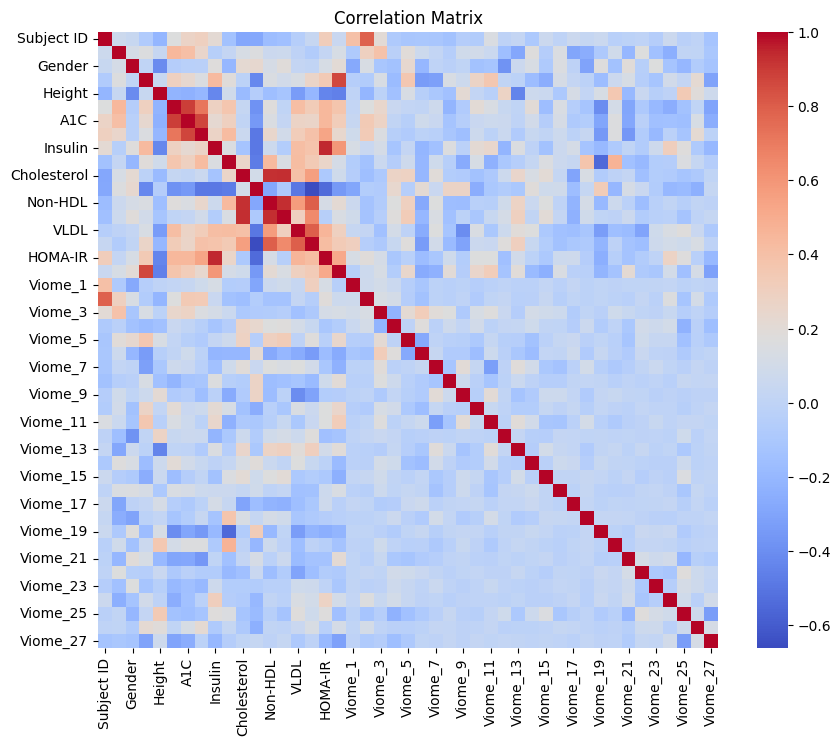

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

demo_viome_train = pd.read_csv("../data/demo_viome_train.csv")
from ast import literal_eval
demo_viome_train['Viome'] = demo_viome_train['Viome'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

viome_expanded = pd.DataFrame(demo_viome_train['Viome'].tolist(), index=demo_viome_train.index)
viome_expanded.columns = [f'Viome_{i+1}' for i in range(viome_expanded.shape[1])]  # Name columns as Viome_1, Viome_2, etc.

demo_viome_train_expanded = pd.concat([demo_viome_train.drop(columns=['Viome']), viome_expanded], axis=1)

numeric_columns = demo_viome_train_expanded.select_dtypes(include=['number'])

if numeric_columns.shape[1] > 0:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numeric columns available for correlation")


In [23]:
import pandas as pd

img_train = pd.read_csv("../data/img_train.csv")

#Display the first row to understand the structure
img_train.head(1)

,Subject ID,Day,Image Before Breakfast,Image Before Lunch
0,1,2,"[[[140, 122, 108], [135, 118, 104], [118, 104,...","[[[41, 152, 201], [77, 164, 205], [88, 157, 13..."


In [24]:
first_image_data = img_train.iloc[0]['Image Before Breakfast'] 
import numpy as np
import ast

first_image_array = np.array(ast.literal_eval(first_image_data))
print("Shape of the first image data:", first_image_array.shape)

Shape of the first image data: (64, 64, 3)


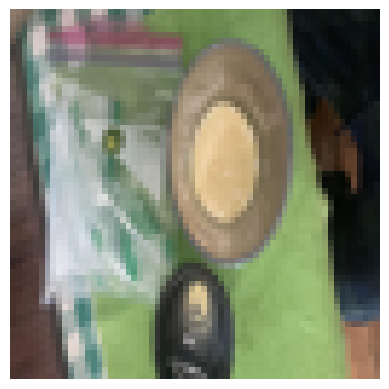

In [25]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(first_image_array)
plt.axis('off')  
plt.show()

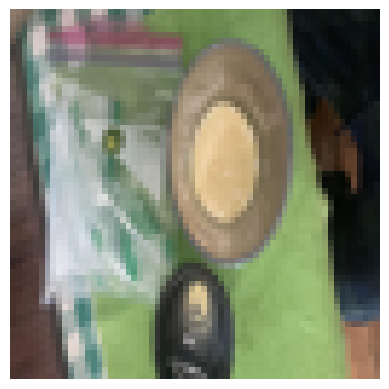

In [26]:
#Normalize pixel values to [0, 1]
first_image_array_normalized = first_image_array / 255.0
plt.imshow(first_image_array_normalized)
plt.axis('off')
plt.show()